Step 1: Loading the dataset...
Dataset loaded successfully.

Step 2: Preprocessing the data...
Data preprocessing complete.

Step 3: Training two different models...

Training Logistic Regression Model...


/tmp/ipython-input-1946593367.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1946593367.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Logistic Regression Model training complete.

Training Random Forest Classifier Model...
Random Forest Classifier Model training complete.

Models trained and saved as 'model_lr.pkl' and 'model_rf.pkl'.

Step 5: Evaluating the models and generating Confusion Matrices...

--- Evaluation for Logistic Regression ---
Model Accuracy (Logistic Regression): 0.8049
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.34      0.50        35
           1       0.79      0.99      0.88        88

    accuracy                           0.80       123
   macro avg       0.86      0.67      0.69       123
weighted avg       0.83      0.80      0.77       123


Confusion Matrix:
[[12 23]
 [ 1 87]]


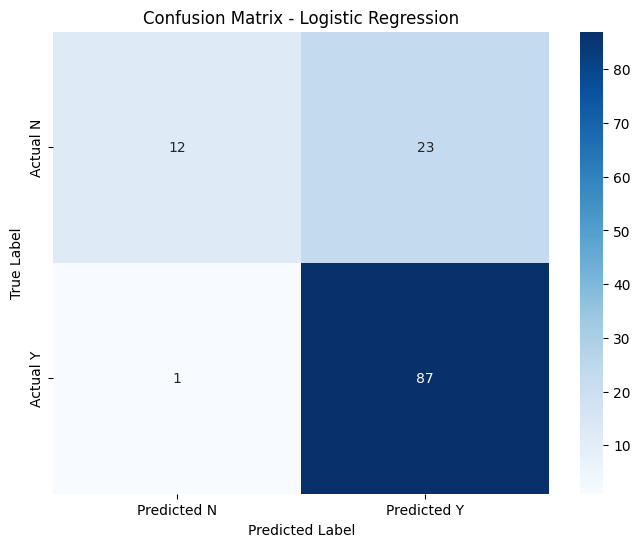


--- Evaluation for Random Forest Classifier ---
Model Accuracy (Random Forest): 0.8130
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.40      0.55        35
           1       0.80      0.98      0.88        88

    accuracy                           0.81       123
   macro avg       0.84      0.69      0.72       123
weighted avg       0.82      0.81      0.79       123


Confusion Matrix:
[[14 21]
 [ 2 86]]


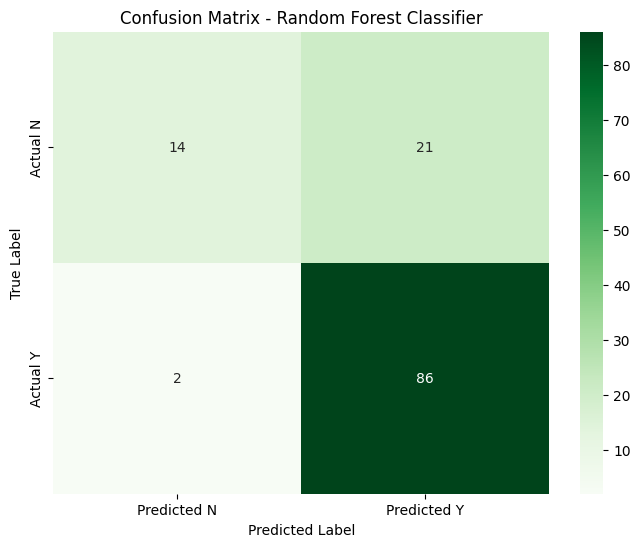


Project complete. Two heatmaps should be displayed in separate windows.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# --- 1. Load the Dataset ---
print("Step 1: Loading the dataset...")
# Make sure your 'data.csv' file is in the same directory as this script.
df = pd.read_csv('data.csv')
print("Dataset loaded successfully.")

# --- 2. Data Preprocessing and Feature Engineering ---
print("\nStep 2: Preprocessing the data...")

# Combine Applicant and Coapplicant incomes to create a new feature 'Total_Income'.
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Drop the original income columns and the Loan_ID as they are no longer needed for the model.
df = df.drop(['ApplicantIncome', 'CoapplicantIncome', 'Loan_ID'], axis=1)

# Handle missing values
# Fill missing numerical values with the mean of their respective columns.
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income']:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing categorical values with the mode (most frequent value) of their columns.
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Clean the 'Dependents' column: replace '3+' with '3' and convert it to a float.
df['Dependents'] = df['Dependents'].str.replace('3+', '3', regex=False).astype(float)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

# Remove rows where the target variable 'Loan_Status' is missing.
df.dropna(subset=['Loan_Status'], inplace=True)

# Convert the target variable ('Loan_Status') from 'Y'/'N' to a numeric format (1/0).
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

# Use one-hot encoding to convert categorical features into a numeric format
# that the machine learning model can understand.
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)
print("Data preprocessing complete.")

# --- 3. Model Training ---
print("\nStep 3: Training two different models...")

# Separate the dataset into features (X) and the target variable (y).
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the data into a training set (80%) and a testing set (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train Logistic Regression Model ---
print("\nTraining Logistic Regression Model...")
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
print("Logistic Regression Model training complete.")

# --- Train Random Forest Classifier Model ---
print("\nTraining Random Forest Classifier Model...")
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
print("Random Forest Classifier Model training complete.")

# --- 4. Model Saving ---
# We now save both trained models to files.
with open('model_lr.pkl', 'wb') as file:
    pickle.dump(model_lr, file)
with open('model_rf.pkl', 'wb') as file:
    pickle.dump(model_rf, file)
print("\nModels trained and saved as 'model_lr.pkl' and 'model_rf.pkl'.")

# --- 5. Model Evaluation with Confusion Matrix and Heatmap ---
print("\nStep 5: Evaluating the models and generating Confusion Matrices...")

# --- Evaluate Logistic Regression Model ---
print("\n--- Evaluation for Logistic Regression ---")
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print(f"Model Accuracy (Logistic Regression): {accuracy_lr:.4f}")
print("Classification Report:")
print(report_lr)
print("\nConfusion Matrix:")
print(cm_lr)

# Create a heatmap for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted N', 'Predicted Y'], yticklabels=['Actual N', 'Actual Y'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- Evaluate Random Forest Classifier Model ---
print("\n--- Evaluation for Random Forest Classifier ---")
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Model Accuracy (Random Forest): {accuracy_rf:.4f}")
print("Classification Report:")
print(report_rf)
print("\nConfusion Matrix:")
print(cm_rf)

# Create a heatmap for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted N', 'Predicted Y'], yticklabels=['Actual N', 'Actual Y'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nProject complete. Two heatmaps should be displayed in separate windows.")